# Projet Mini-APTERROS

Notebook de tracé des données du banc d'essais des turbines.

In [1]:
%matplotlib  inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
from pandas import read_csv

#### Liste des fichiers CSV du répertoire courant :

In [2]:
CSV_files = [f for f in os.listdir() if f.lower().endswith('.csv')]
CSV_files

['turbines_calibration.csv', 'turb_calibration.csv']

#### Choix du fichier à traiter :

In [3]:
file = CSV_files[1]
file

'turb_calibration.csv'

#### Lecture du fichier CSV :

In [4]:
data = []
start_line = 6
pwm_min, pwm_max = 1000, 2000
with open(file, "r", encoding="utf8") as F:
    lines= F.readlines()
pulse_width, PWM, thrust = [], [], []
for L in lines[start_line:]:
    if L[0] == "#": continue
    try:
        data = L.strip().replace(' ','').replace(',','.').replace(';;',';0;').split(';')
        data = list(map(float, data))
        pulse_width.append(data[1])
        pwm_value = (data[1] - pwm_min)/(pwm_max - pwm_min)
        PWM.append(100*pwm_value)
        thrust.append(data[4::2])
    except:
        print(f"An error occured while processing file <{file}>")
PWM    = np.array(PWM)
thrust = np.array(thrust)

#### Retrancher l'offset (poussée pour 1000 $\mu$s) aux valeurs de poussées):

In [5]:
thrust_N = (thrust - thrust[0])/1000*9.81
print(f"{thrust_N=} kg")

thrust_N=array([[ 0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      , -0.240345,  0.      ],
       [ 0.46107 ,  0.51993 ,  0.845622,  0.52974 ],
       [ 1.16739 ,  1.42245 ,  1.064385,  1.29492 ],
       [ 1.57941 ,  2.70756 ,  2.163105,  2.32497 ],
       [ 1.79523 ,  4.0221  ,  3.202965,  3.56103 ],
       [ 2.08953 ,  5.36607 ,  4.213395,  5.24835 ],
       [ 3.86514 ,  6.95529 ,  5.351355,  7.11225 ],
       [ 5.61132 ,  8.94672 ,  7.382025,  8.60337 ],
       [ 7.75971 , 10.46727 ,  9.255735,  9.87867 ],
       [ 9.30969 , 11.87991 , 10.629135, 11.38941 ],
       [10.25145 , 13.21407 , 11.718045, 12.63528 ],
       [11.62485 , 14.31279 , 12.934485, 13.9302  ],
       [12.82167 , 15.51942 , 14.062635, 15.11721 ],
       [13.85172 , 16.46118 , 14.974965, 15.97068 ],
       [15.02892 , 17.54028 , 16.014825, 17.20674 ],
       [16.05897 , 18.45261 , 16.907535, 18.12888 ],
       [17.14788 , 19.46304 , 17.819865, 18.95292 ],
       [18.20736 , 20.66967 , 18.7223

#### Tracé des courbes :

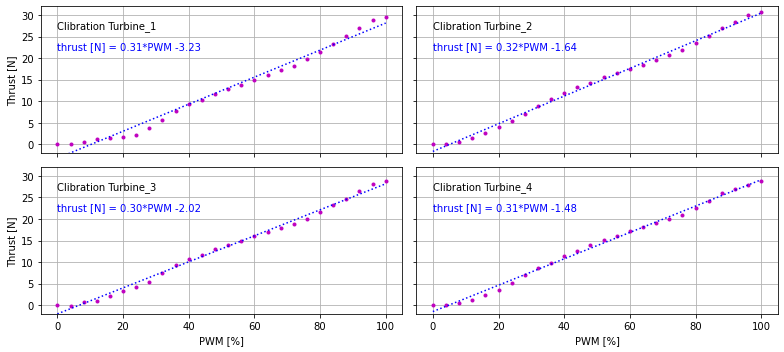

In [6]:
title = "Calibration of Turbines"

fig, axes = plt.subplots(2, 2, sharex='col',  sharey='row', layout='tight')
fig.set_size_inches(11, 5)

for i, (axe, thrust) in enumerate( zip(axes.flatten(), thrust_N.T) ):
    axe.plot(PWM, thrust, 'om', markersize=3)
    axe.grid()
    axe.set_ylim(-2, 32)
    if i in(2,3):axe.set_xlabel("PWM [%]")
    if i in(0,2): axe.set_ylabel("Thrust [N]")
    axe.text(0, 27, f"Clibration Turbine_{i+1}")
    
    slope, intercept = stats.linregress(PWM, thrust)[:2]
    y = slope*PWM + intercept
    axe.plot(PWM, y, ":b");
    label = f"thrust [N] = {slope:.2f}*PWM {intercept:+.2f}"
    axe.text(0, 22, label, fontsize=10, color='b')

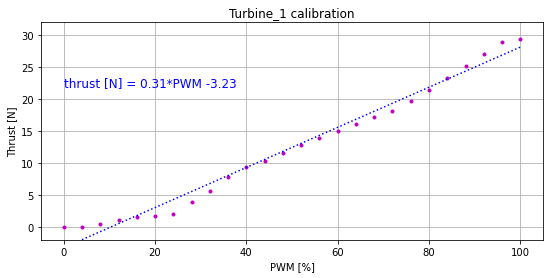

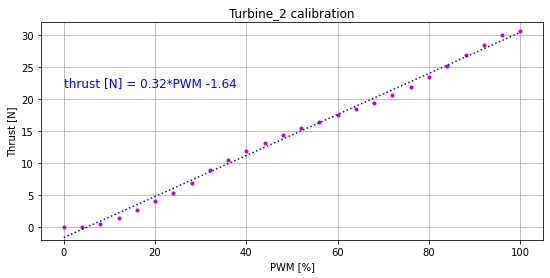

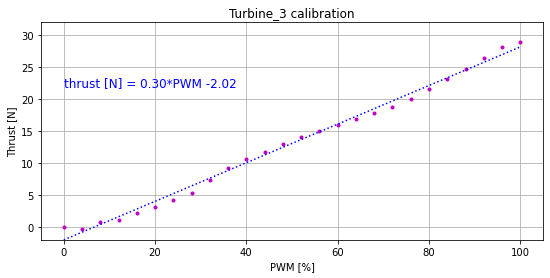

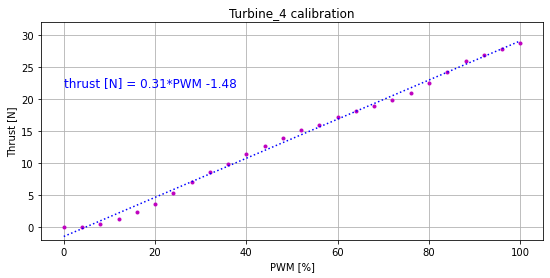

In [7]:
title = "Calibration of Turbines"

for i, thrust in enumerate(thrust_N.T):
    plt.figure(figsize=(9,4))
    plt.plot(PWM, thrust, 'om', markersize=3)
    plt.grid()
    plt.ylim(-2,32)
    plt.xlabel("PWM [%]")
    plt.ylabel("Thrust [N]")
    title = f"Turbine_{i+1} calibration"
    plt.title(title)
    
    slope, intercept = stats.linregress(PWM, thrust)[:2]
    y = slope*PWM + intercept
    plt.plot(PWM, y, ":b");
    label = f"thrust [N] = {slope:.2f}*PWM {intercept:+.2f}"
    plt.text(0, 22, label, fontsize=12, color='b')
    plt.savefig(f"{title}.png")

#### Écrire la table (PWM, Poussée) qui sera utilisée pour la simulation PuBullet:

In [8]:
turbines_array_file = "calib_4turbines"

In [9]:
four_turbines_array = np.zeros((5,PWM.shape[0]))
four_turbines_array[0] = PWM
four_turbines_array[1:] = thrust_N.T

np.savez(turbines_array_file, four_turbines_array, four_turbines_array=four_turbines_array)